# Name: Mahesh Chandra Duddu
# Email: duddumaheshchandra@gmail.com
# PhNo: 9440642368

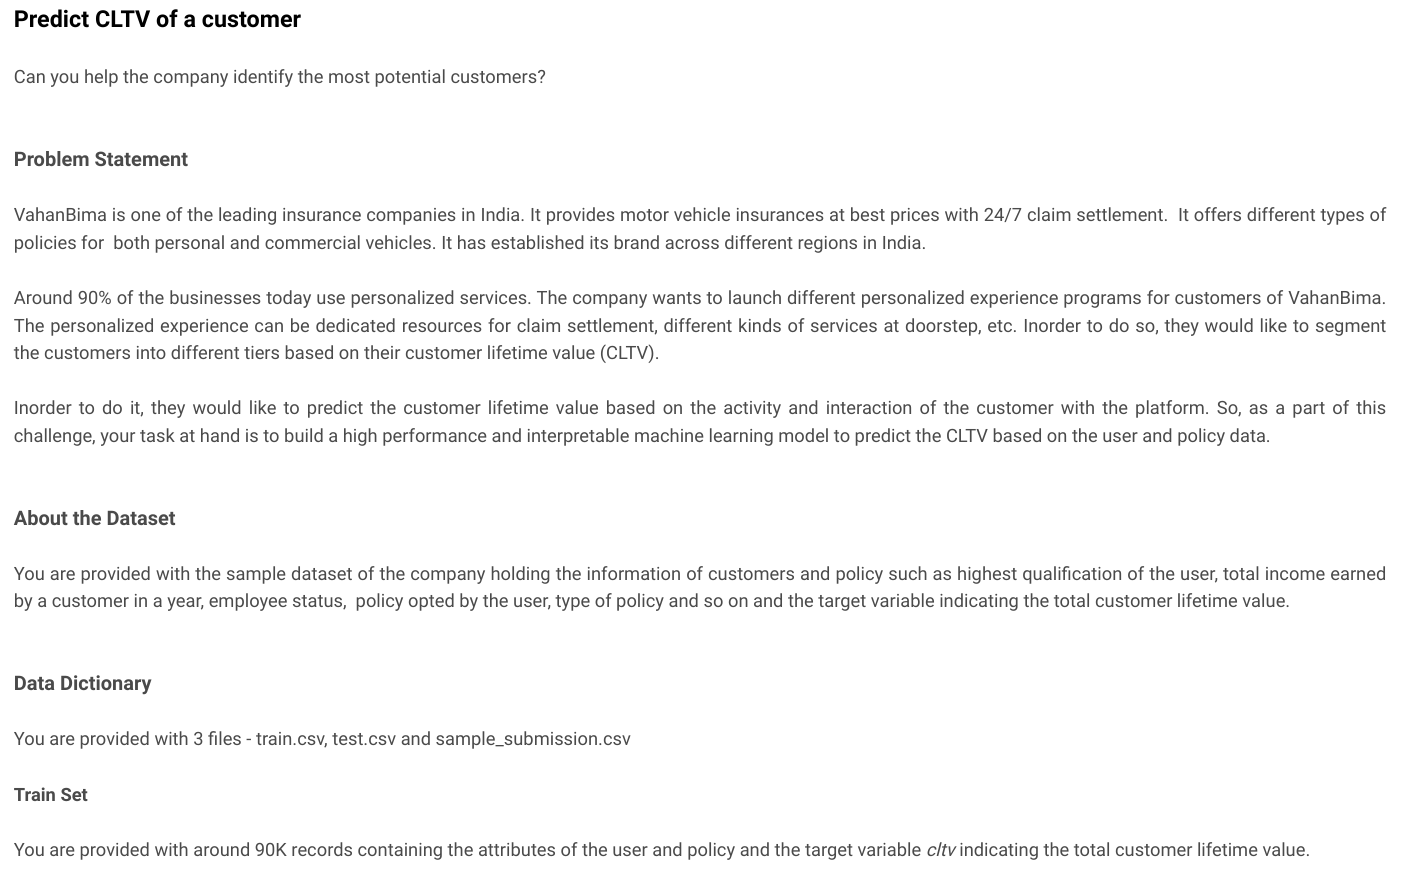
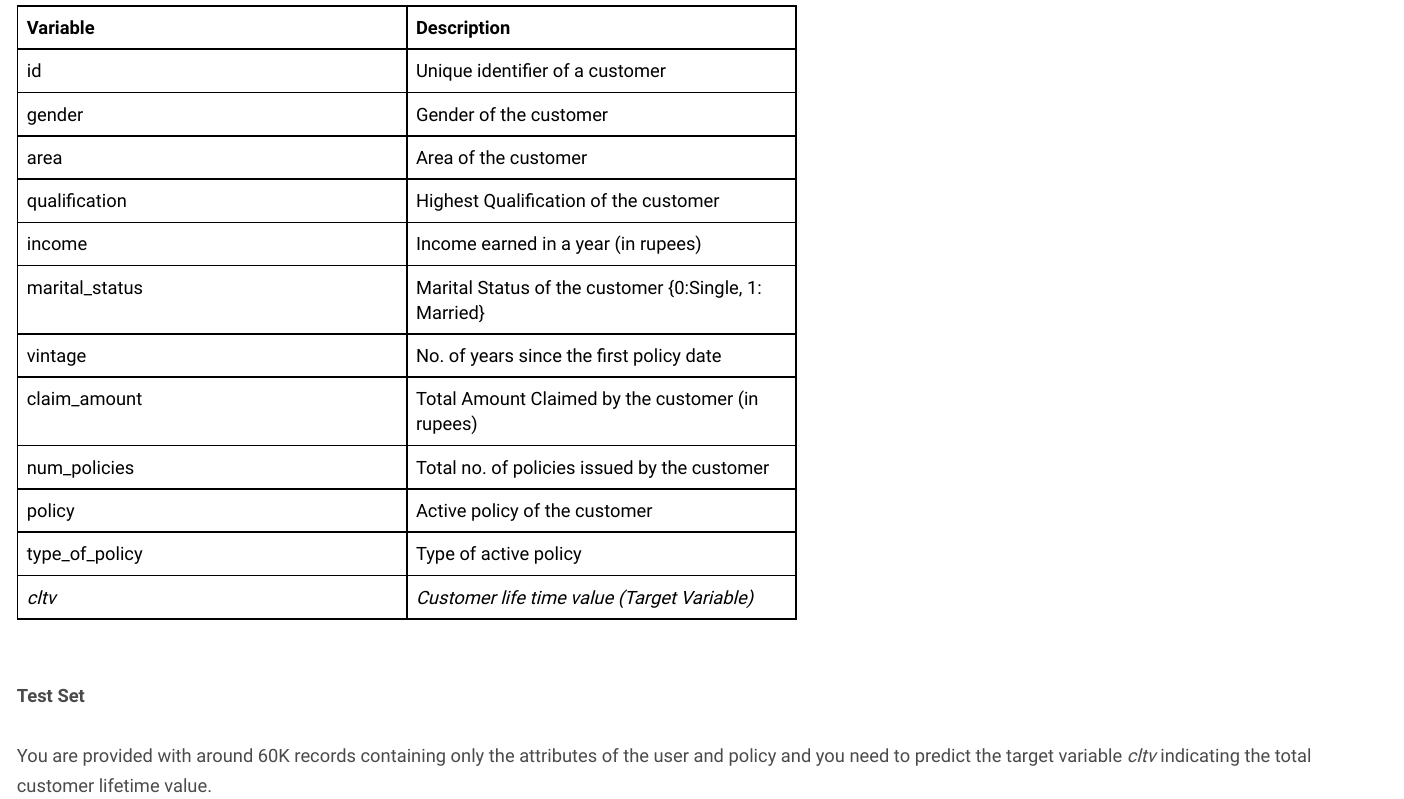
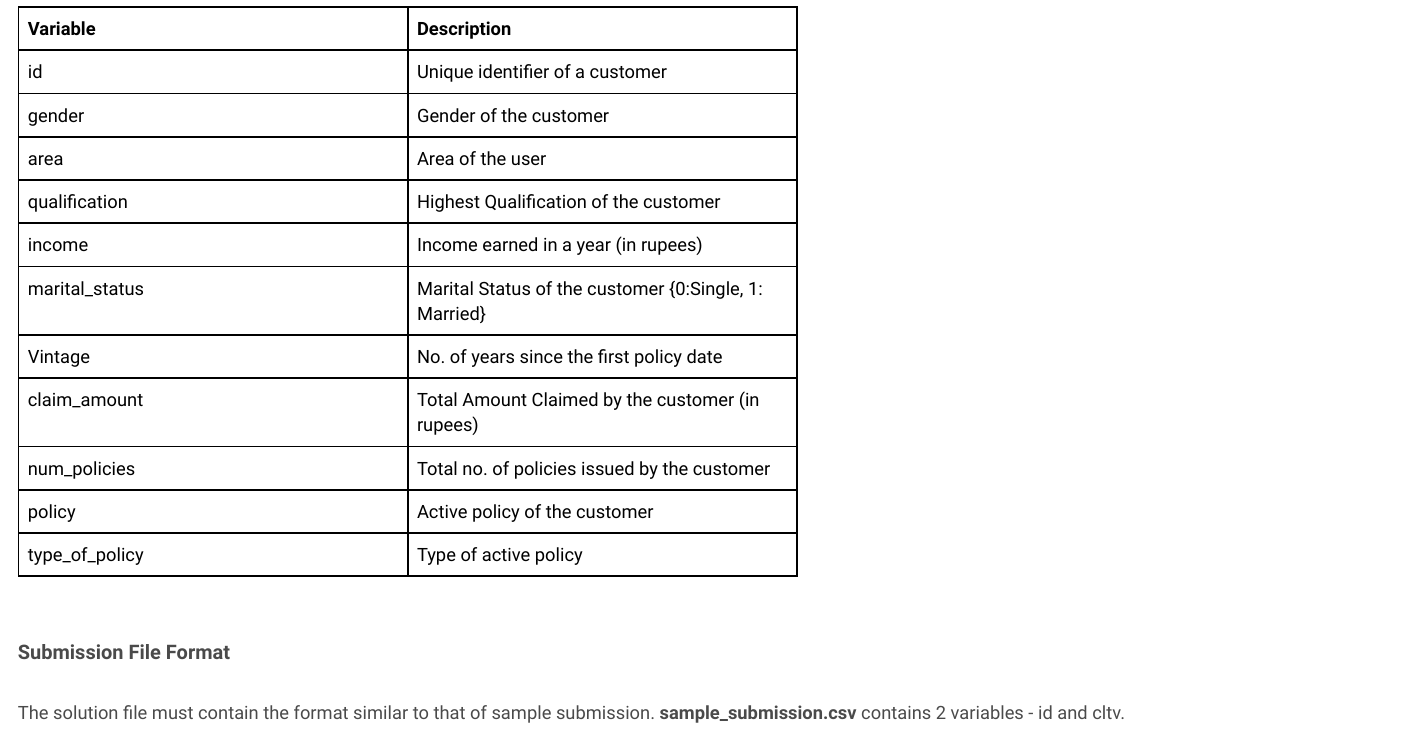
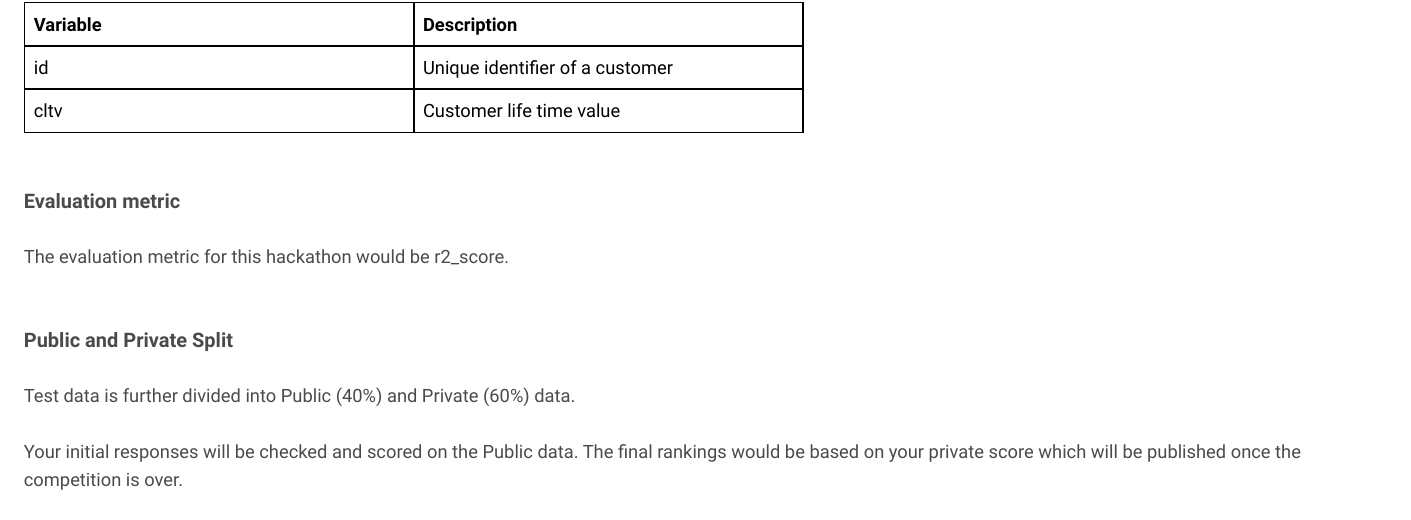
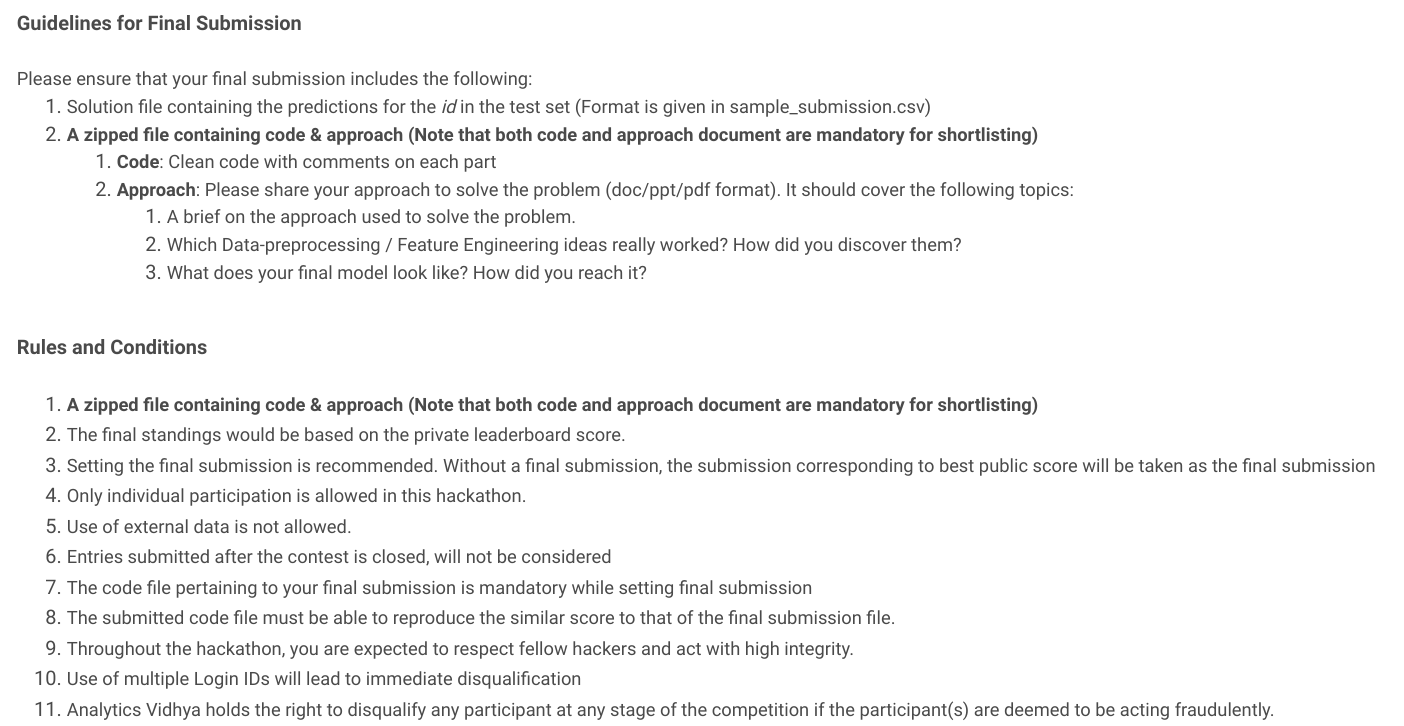

In [5]:
import pandas as pd
import optuna
import numpy as np
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
train = pd.read_csv("/kaggle/input/jobathonjan2023/train.csv")
test = pd.read_csv("/kaggle/input/jobathonjan2023/test.csv")
sample = pd.read_csv("/kaggle/input/jobathonjan2023/sample_submission.csv")

In [7]:
# train['claim_by_vintage'] = train['claim_amount']*train['vintage']
# test['claim_by_vintage'] = test['claim_amount']*test['vintage']


from sklearn.preprocessing import LabelEncoder, StandardScaler
cat_feat = ['income', 'num_policies', 'policy', 'type_of_policy','gender','area', 'qualification']
odf_tr = train[cat_feat].copy(deep=True)
odf_te = test[cat_feat].copy(deep = True)

odf_tr = pd.get_dummies(odf_tr, drop_first = True)
odf_te = pd.get_dummies(odf_te, drop_first = True)
train = pd.concat([train, odf_tr], axis = 1)
test = pd.concat([test, odf_te], axis = 1)
le = LabelEncoder()
train['gender_le'] = le.fit_transform(train['gender'])
test['gender_le'] = le.transform(test['gender'])
train['numpolicies_le'] = le.fit_transform(train['num_policies'])
test['numpolicies_le'] = le.transform(test['num_policies'])
train['area_le'] = le.fit_transform(train['area'])
test['area_le'] = le.transform(test['area'])
train['qualification_le'] = le.fit_transform(train['qualification'])
test['qualification_le'] = le.transform(test['qualification'])
train['typepolicy_le'] = le.fit_transform(train['type_of_policy'])
test['typepolicy_le'] = le.transform(test['type_of_policy'])
train['income_le'] = le.fit_transform(train['income'])
test['income_le'] = le.transform(test['income'])
train['policy_le'] = le.fit_transform(train['policy'])
test['policy_le'] = le.transform(test['policy'])
# train['numpolicies_le']
# train['claimamt_std'] = train['claim_amount'].mean() - train['claim_amount']
# test['claimamt_std'] = test['claim_amount'].mean() - test['claim_amount']
# train['claimamt_min'] = train['claim_amount'].min() - train['claim_amount']
# test['claimamt_min'] = test['claim_amount'].min() - test['claim_amount']
# train['amntperyr'] = train['claim_amount']/train['vintage']
# test['amntperyr'] = test['claim_amount']/test['vintage']
# train['claimamt_max'] = train['claim_amount'].max() - train['claim_amount']
# test['claimamt_max'] = test['claim_amount'].max() - test['claim_amount']
# train['incomelebyclaim'] = train['income_le']/train['claim_amount']
# test['incomelebyclaim'] = test['income_le']/test['claim_amount']
# train.replace([np.inf, -np.inf], -1, inplace=True)
# test.replace([np.inf, -np.inf], -1, inplace=True)
feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()

In [8]:
# feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()
tr_scores = []
vl_scores = []
test_preds = []
l = []
fold_no = 1
cat_feat = ['income', 'num_policies', 'policy', 'type_of_policy','gender', 'marital_status', 'area', 'qualification']

# train.drop(cat_feat, axis = 1, inplace = True)
# test.drop(cat_feat, axis = 1, inplace = True)
feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()

X = train[feat]
y = train['cltv']
# sc = StandardScaler()
# x = sc.fit_transform(X)
# X = pd.DataFrame(x, columns = feat)
# te = sc.transform(test[feat])
# test = pd.DataFrame(te, columns = feat)
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor, Lasso, ElasticNet, RANSACRegressor, Ridge, RidgeCV, LassoCV
# automl.fit(X, y, task="regression", time_budget=120)
kf = KFold(n_splits=10, shuffle = True, random_state=42)
for train_index, test_index in kf.split(X,y):
    print("{} fold of {} KFolds".format(fold_no, kf.n_splits))
    xtr, xte = X.iloc[train_index], X.iloc[test_index]
    ytr, yte = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(cat_features=cat_feat, random_state=42, verbose = False, early_stopping_rounds = 12, learning_rate= 0.027185169832094628, n_estimators = 227)
#     params = {'n_estimators': 352, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.07835595084168827, 'log_max_bin': 10, 'colsample_bytree': 0.8167299432407218, 'reg_alpha': 0.0009765625, 'reg_lambda': 28.2811339924568, 'random_state' : 42}
#     model = LGBMRegressor(**params)
#     model = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
#     model = LGBMRegressor(random_state=42, n_jobs= -1)
#     model = XGBRegressor(random_state=42, n_jobs= -1)
#     model = DecisionTreeRegressor(random_state=42)
#     model = Lasso(random_state = 42, max_iter = 10000)
#     model = ElasticNet(random_state = 42, max_iter = 10000)
#     model = RANSACRegressor(random_state = 42)
#     model = Ridge(random_state = 42, max_iter = 10000)
#     model = RidgeCV()
#     model = LassoCV(random_state = 42, max_iter = 10000, n_jobs = -1)
    model.fit(xtr, ytr)
    trpreds = model.predict(xtr)
    vlpreds = model.predict(xte)
    tepreds = model.predict(test[feat])
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                        columns=['importance'])
    sum = feature_importances.values
    l.append(sum)
    
    trscore = r2_score(ytr,trpreds)
    vlscore = r2_score(yte, vlpreds)
    print("Training R2 Score = ", trscore)
    print("Validation R2 Score = ", vlscore)
    tr_scores.append(trscore)
    vl_scores.append(vlscore)
    test_preds.append(tepreds)
    fold_no +=1
print("Mean Train set R2 score across folds = ", np.mean(tr_scores))
print("Mean Valid set R2 score across folds = ", np.mean(vl_scores))

1 fold of 10 KFolds
Training R2 Score =  0.16425064627909403
Validation R2 Score =  0.16307512191355733
2 fold of 10 KFolds
Training R2 Score =  0.16428598966472951
Validation R2 Score =  0.15760583414027685
3 fold of 10 KFolds
Training R2 Score =  0.1635776115018196
Validation R2 Score =  0.16169444780589992
4 fold of 10 KFolds
Training R2 Score =  0.16449553978815679
Validation R2 Score =  0.15854875095332466
5 fold of 10 KFolds
Training R2 Score =  0.16382643886563308
Validation R2 Score =  0.16388332441930997
6 fold of 10 KFolds
Training R2 Score =  0.16482320006094753
Validation R2 Score =  0.15251576252223908
7 fold of 10 KFolds
Training R2 Score =  0.16338720892090486
Validation R2 Score =  0.16579462160395897
8 fold of 10 KFolds
Training R2 Score =  0.1637866728652252
Validation R2 Score =  0.16548350575226722
9 fold of 10 KFolds
Training R2 Score =  0.1649191999476992
Validation R2 Score =  0.15524945095013942
10 fold of 10 KFolds
Training R2 Score =  0.16381733770591922
Valid

29

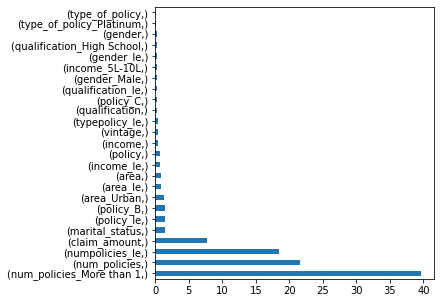

In [9]:
threshold=0.0005
add=0
for item in l:
    add+=item
df_cv=pd.DataFrame(add/len(l),index=X.columns,columns=["importance"]).sort_values('importance', ascending=False)
imp_columns=df_cv[df_cv['importance']>threshold].index.tolist()
df_cv=df_cv.reset_index()
feat_imp = pd.Series(df_cv.importance.values, index=df_cv.drop(["importance"], axis=1)).sort_values(axis='index',ascending=False)
X2=X[imp_columns]
feat_imp.nlargest(25).plot(kind='barh', figsize=(5,5))
len(imp_columns)

In [10]:
# feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()
tr_scores = []
vl_scores = []
test_preds = []
l = []
fold_no = 1
cat_feat = ['income', 'num_policies', 'policy', 'type_of_policy','gender', 'marital_status', 'area', 'qualification']

# train.drop(cat_feat, axis = 1, inplace = True)
# test.drop(cat_feat, axis = 1, inplace = True)
feat = imp_columns

X = train[feat]
y = train['cltv']
# sc = StandardScaler()
# x = sc.fit_transform(X)
# X = pd.DataFrame(x, columns = feat)
# te = sc.transform(test[feat])
# test = pd.DataFrame(te, columns = feat)
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor, Lasso, ElasticNet, RANSACRegressor, Ridge, RidgeCV, LassoCV
# automl.fit(X, y, task="regression", time_budget=120)
for train_index, test_index in kf.split(X,y):
    print("{} fold of {} KFolds".format(fold_no, kf.n_splits))
    xtr, xte = X.iloc[train_index], X.iloc[test_index]
    ytr, yte = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(cat_features=cat_feat, random_state=42, verbose = False, early_stopping_rounds = 12, learning_rate= 0.027185169832094628, n_estimators = 227)
#     params = {'n_estimators': 352, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.07835595084168827, 'log_max_bin': 10, 'colsample_bytree': 0.8167299432407218, 'reg_alpha': 0.0009765625, 'reg_lambda': 28.2811339924568, 'random_state' : 42}
#     model = LGBMRegressor(**params)
#     model = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
#     model = LGBMRegressor(random_state=42, n_jobs= -1)
#     model = XGBRegressor(random_state=42, n_jobs= -1)
#     model = DecisionTreeRegressor(random_state=42)
#     model = Lasso(random_state = 42, max_iter = 10000)
#     model = ElasticNet(random_state = 42, max_iter = 10000)
#     model = RANSACRegressor(random_state = 42)
#     model = Ridge(random_state = 42, max_iter = 10000)
#     model = RidgeCV()
#     model = LassoCV(random_state = 42, max_iter = 10000, n_jobs = -1)
    model.fit(xtr, ytr)
    trpreds = model.predict(xtr)
    vlpreds = model.predict(xte)
    tepreds = model.predict(test[feat])
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                        columns=['importance'])
    sum = feature_importances.values
    l.append(sum)
    
    trscore = r2_score(ytr,trpreds)
    vlscore = r2_score(yte, vlpreds)
    print("Training R2 Score = ", trscore)
    print("Validation R2 Score = ", vlscore)
    tr_scores.append(trscore)
    vl_scores.append(vlscore)
    test_preds.append(tepreds)
    fold_no +=1
print("Mean Train set R2 score across folds = ", np.mean(tr_scores))
print("Mean Valid set R2 score across folds = ", np.mean(vl_scores))

1 fold of 10 KFolds
Training R2 Score =  0.1639581570162595
Validation R2 Score =  0.1629348019107808
2 fold of 10 KFolds
Training R2 Score =  0.16438401758763743
Validation R2 Score =  0.15740148781016627
3 fold of 10 KFolds
Training R2 Score =  0.1633884981689614
Validation R2 Score =  0.1619314542473579
4 fold of 10 KFolds
Training R2 Score =  0.1642200489733131
Validation R2 Score =  0.15869416697933802
5 fold of 10 KFolds
Training R2 Score =  0.1637713270934802
Validation R2 Score =  0.16402958065921547
6 fold of 10 KFolds
Training R2 Score =  0.1649120760589351
Validation R2 Score =  0.1525515213864107
7 fold of 10 KFolds
Training R2 Score =  0.16333364358689717
Validation R2 Score =  0.16570349595362932
8 fold of 10 KFolds
Training R2 Score =  0.16336014563587709
Validation R2 Score =  0.16505777344742523
9 fold of 10 KFolds
Training R2 Score =  0.1650209371183593
Validation R2 Score =  0.15518491000764423
10 fold of 10 KFolds
Training R2 Score =  0.1639020681082649
Validation R

# CatBoost HyperParameter Tuning with Optuna!


In [13]:
def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    param = {
        "loss_function": trial.suggest_categorical("loss_function", ["RMSE", "MAE"]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-5, 1e0),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 1e0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 10),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 2, 20),
        "one_hot_max_size": trial.suggest_int("one_hot_max_size", 2, 20),  
    }
    # Conditional Hyper-Parameters
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    reg = CatBoostRegressor(**param, cat_features=cat_feat)
    reg.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    return score

In [14]:
# X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25)
from optuna.samplers import TPESampler
study = optuna.create_study(sampler=TPESampler(), direction="maximize")
study.optimize(objective, n_trials=10, timeout=600) # Run for 10 minutes
print("Number of completed trials: {}".format(len(study.trials)))
print("Best trial:")
trial = study.best_trial

print("\tBest Score: {}".format(trial.value))
print("\tBest Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2023-01-22 17:49:56,012] A new study created in memory with name: no-name-56281d32-f360-414e-bb2f-6c765025928e
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  
[I 2023-01-22 17:50:03,635] Trial 0 finished with value: -0.10421325367977796 and parameters: {'loss_function': 'MAE', 'learning_rate': 0.0005910679957648827, 'l2_leaf_reg': 0.05410042379819129, 'colsample_bylevel': 0.023768550501441953, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'min_da

Number of completed trials: 10
Best trial:
	Best Score: 0.15590104194555232
	Best Params: 
    loss_function: RMSE
    learning_rate: 0.6690627450760562
    l2_leaf_reg: 0.011202147399887981
    colsample_bylevel: 0.013794724331021888
    depth: 2
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    min_data_in_leaf: 11
    one_hot_max_size: 9
    subsample: 0.313919199224144


# Re-training with Tuned Hyperparameters

In [15]:
# feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()
tr_scores = []
vl_scores = []
test_preds = []
l = []
fold_no = 1
cat_feat = ['income', 'num_policies', 'policy', 'type_of_policy','gender', 'marital_status', 'area', 'qualification']

# train.drop(cat_feat, axis = 1, inplace = True)
# test.drop(cat_feat, axis = 1, inplace = True)
feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()

X = train[feat]
y = train['cltv']
# sc = StandardScaler()
# x = sc.fit_transform(X)
# X = pd.DataFrame(x, columns = feat)
# te = sc.transform(test[feat])
# test = pd.DataFrame(te, columns = feat)
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor, Lasso, ElasticNet, RANSACRegressor, Ridge, RidgeCV, LassoCV
# automl.fit(X, y, task="regression", time_budget=120)
for train_index, test_index in kf.split(X,y):
    print("{} fold of {} KFolds".format(fold_no, kf.n_splits))
    xtr, xte = X.iloc[train_index], X.iloc[test_index]
    ytr, yte = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(cat_features=cat_feat, random_state=42, verbose = False, **study.best_params)
#     params = {'n_estimators': 352, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.07835595084168827, 'log_max_bin': 10, 'colsample_bytree': 0.8167299432407218, 'reg_alpha': 0.0009765625, 'reg_lambda': 28.2811339924568, 'random_state' : 42}
#     model = LGBMRegressor(**params)
#     model = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
#     model = LGBMRegressor(random_state=42, n_jobs= -1)
#     model = XGBRegressor(random_state=42, n_jobs= -1)
#     model = DecisionTreeRegressor(random_state=42)
#     model = Lasso(random_state = 42, max_iter = 10000)
#     model = ElasticNet(random_state = 42, max_iter = 10000)
#     model = RANSACRegressor(random_state = 42)
#     model = Ridge(random_state = 42, max_iter = 10000)
#     model = RidgeCV()
#     model = LassoCV(random_state = 42, max_iter = 10000, n_jobs = -1)
    model.fit(xtr, ytr)
    trpreds = model.predict(xtr)
    vlpreds = model.predict(xte)
    tepreds = model.predict(test[feat])
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                        columns=['importance'])
    sum = feature_importances.values
    l.append(sum)
    
    trscore = r2_score(ytr,trpreds)
    vlscore = r2_score(yte, vlpreds)
    print("Training R2 Score = ", trscore)
    print("Validation R2 Score = ", vlscore)
    tr_scores.append(trscore)
    vl_scores.append(vlscore)
    test_preds.append(tepreds)
    fold_no +=1
print("Mean Train set R2 score across folds = ", np.mean(tr_scores))
print("Mean Valid set R2 score across folds = ", np.mean(vl_scores))

1 fold of 10 KFolds
Training R2 Score =  0.16100827278849206
Validation R2 Score =  0.15934436883947745
2 fold of 10 KFolds
Training R2 Score =  0.16140007546164503
Validation R2 Score =  0.15523053547971832
3 fold of 10 KFolds
Training R2 Score =  0.1606984416695978
Validation R2 Score =  0.16003181208509876
4 fold of 10 KFolds
Training R2 Score =  0.16107424417274196
Validation R2 Score =  0.15615345532374125
5 fold of 10 KFolds
Training R2 Score =  0.16020552082824413
Validation R2 Score =  0.16449688763094128
6 fold of 10 KFolds
Training R2 Score =  0.1619952943597217
Validation R2 Score =  0.1508017140056812
7 fold of 10 KFolds
Training R2 Score =  0.16012058144690222
Validation R2 Score =  0.16609336993504553
8 fold of 10 KFolds
Training R2 Score =  0.1597693195321882
Validation R2 Score =  0.16219372786028896
9 fold of 10 KFolds
Training R2 Score =  0.1609309773188592
Validation R2 Score =  0.15512715030698798
10 fold of 10 KFolds
Training R2 Score =  0.16055196611037936
Validat

29

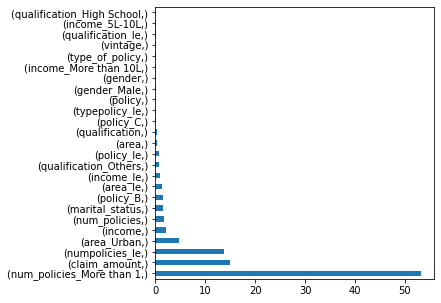

In [16]:
threshold=0.0005
add=0
for item in l:
    add+=item
df_cv=pd.DataFrame(add/len(l),index=X.columns,columns=["importance"]).sort_values('importance', ascending=False)
imp_columns=df_cv[df_cv['importance']>threshold].index.tolist()
df_cv=df_cv.reset_index()
feat_imp = pd.Series(df_cv.importance.values, index=df_cv.drop(["importance"], axis=1)).sort_values(axis='index',ascending=False)
X2=X[imp_columns]
feat_imp.nlargest(25).plot(kind='barh', figsize=(5,5))
len(imp_columns)

In [17]:
# feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()
tr_scores = []
vl_scores = []
test_preds = []
l = []
fold_no = 1
cat_feat = ['income', 'num_policies', 'policy', 'type_of_policy','gender', 'marital_status', 'area', 'qualification']

# train.drop(cat_feat, axis = 1, inplace = True)
# test.drop(cat_feat, axis = 1, inplace = True)
feat = train.drop(['id', 'cltv'], axis = 1).columns.to_list()

X = train[feat]
y = train['cltv']
# sc = StandardScaler()
# x = sc.fit_transform(X)
# X = pd.DataFrame(x, columns = feat)
# te = sc.transform(test[feat])
# test = pd.DataFrame(te, columns = feat)
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, HuberRegressor, SGDRegressor, Lasso, ElasticNet, RANSACRegressor, Ridge, RidgeCV, LassoCV
# automl.fit(X, y, task="regression", time_budget=120)
for train_index, test_index in kf.split(X,y):
    print("{} fold of {} KFolds".format(fold_no, kf.n_splits))
    xtr, xte = X.iloc[train_index], X.iloc[test_index]
    ytr, yte = y.iloc[train_index], y.iloc[test_index]
    
    model = CatBoostRegressor(cat_features=cat_feat, random_state=42, verbose = False, early_stopping_rounds = 12, learning_rate= 0.027185169832094628, n_estimators = 227)
#     params = {'n_estimators': 352, 'num_leaves': 4, 'min_child_samples': 7, 'learning_rate': 0.07835595084168827, 'log_max_bin': 10, 'colsample_bytree': 0.8167299432407218, 'reg_alpha': 0.0009765625, 'reg_lambda': 28.2811339924568, 'random_state' : 42}
#     model = LGBMRegressor(**params)
#     model = ExtraTreesRegressor(random_state = 42, n_jobs = -1)
#     model = LGBMRegressor(random_state=42, n_jobs= -1)
#     model = XGBRegressor(random_state=42, n_jobs= -1)
#     model = DecisionTreeRegressor(random_state=42)
#     model = Lasso(random_state = 42, max_iter = 10000)
#     model = ElasticNet(random_state = 42, max_iter = 10000)
#     model = RANSACRegressor(random_state = 42)
#     model = Ridge(random_state = 42, max_iter = 10000)
#     model = RidgeCV()
#     model = LassoCV(random_state = 42, max_iter = 10000, n_jobs = -1)
    model.fit(xtr, ytr)
    trpreds = model.predict(xtr)
    vlpreds = model.predict(xte)
    tepreds = model.predict(test[feat])
    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X.columns,
                                        columns=['importance'])
    sum = feature_importances.values
    l.append(sum)
    
    trscore = r2_score(ytr,trpreds)
    vlscore = r2_score(yte, vlpreds)
    print("Training R2 Score = ", trscore)
    print("Validation R2 Score = ", vlscore)
    tr_scores.append(trscore)
    vl_scores.append(vlscore)
    test_preds.append(tepreds)
    fold_no +=1
print("Mean Train set R2 score across folds = ", np.mean(tr_scores))
print("Mean Valid set R2 score across folds = ", np.mean(vl_scores))

1 fold of 10 KFolds
Training R2 Score =  0.16425064627909403
Validation R2 Score =  0.16307512191355733
2 fold of 10 KFolds
Training R2 Score =  0.16428598966472951
Validation R2 Score =  0.15760583414027685
3 fold of 10 KFolds
Training R2 Score =  0.1635776115018196
Validation R2 Score =  0.16169444780589992
4 fold of 10 KFolds
Training R2 Score =  0.16449553978815679
Validation R2 Score =  0.15854875095332466
5 fold of 10 KFolds
Training R2 Score =  0.16382643886563308
Validation R2 Score =  0.16388332441930997
6 fold of 10 KFolds
Training R2 Score =  0.16482320006094753
Validation R2 Score =  0.15251576252223908
7 fold of 10 KFolds
Training R2 Score =  0.16338720892090486
Validation R2 Score =  0.16579462160395897
8 fold of 10 KFolds
Training R2 Score =  0.1637866728652252
Validation R2 Score =  0.16548350575226722
9 fold of 10 KFolds
Training R2 Score =  0.1649191999476992
Validation R2 Score =  0.15524945095013942
10 fold of 10 KFolds
Training R2 Score =  0.16381733770591922
Valid

In [18]:
sample['cltv'] = np.mean(test_preds, axis = 0)
sample.to_csv('final_submission.csv', index = False)